# Exploratory Data Analysis

In [2]:

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import SMOTE

# importing neccessary libraries 
import pandas as pd 
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, BertPreTrainedModel, BertModel,AdamW
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords
import argparse
import logging
import os

/Users/zachwolpe/miniforge3/envs/mlxgo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zachwolpe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Sample Data & Train Test Split

# Analysis

In [ ]:
PATH_TO_DATA = './data/processed '

In [8]:
df = pd.read_csv('./data/working/womenclothing/customer_reviews.csv')

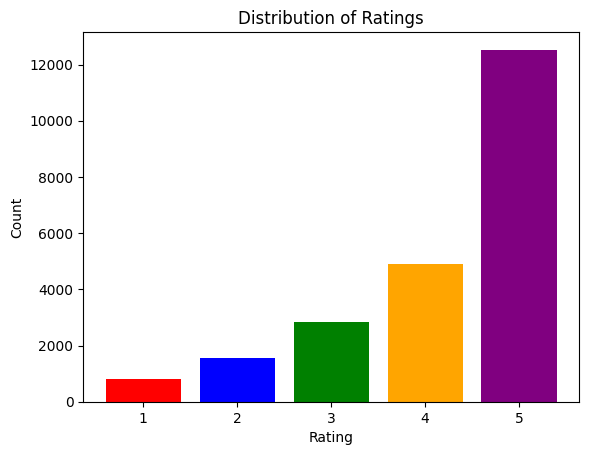

In [9]:
import matplotlib.pyplot as plt

# Defining the x and y values
x = [1, 2, 3, 4, 5]
y = [821, 1549, 2823, 4908, 12527]

# Creating a bar chart of the ratings data
plt.bar(x, y)

# Defining the colors for the bars
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Creating a bar chart with different colors
plt.bar(x, y, color=colors)


# Setting the chart title and axis labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Displaying the chart
plt.show()

# Imbalanced Data

In [12]:
df.head()
df.shape

X_text = df['Review Text']  # Text data```
y = df['Sentiment']  # Target variable

In [13]:
# Convert sentiment labels to 2, 1, 0
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
y = y.map(label_mapping)

In [15]:
y.unique()

array([1, 2, 0])

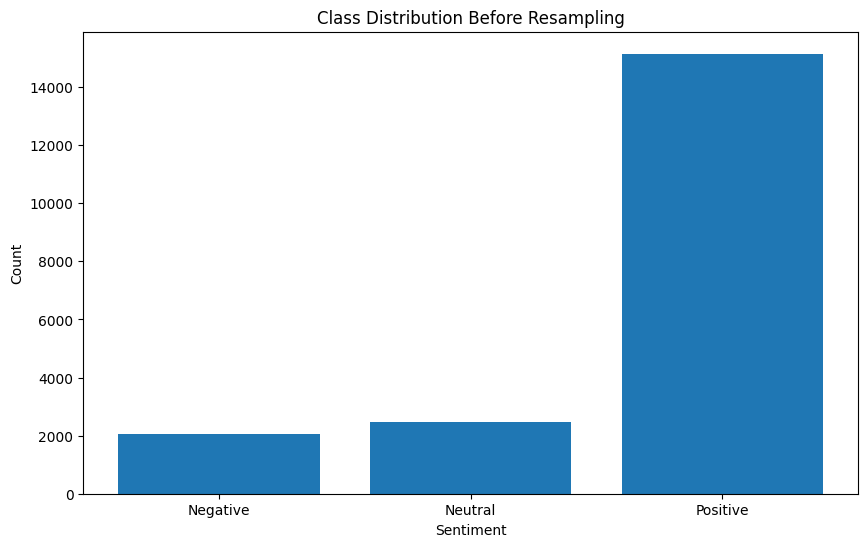

In [14]:
# Visualize the class distribution before resampling
plt.figure(figsize=(10, 6))
plt.bar(Counter(y).keys(), Counter(y).values())
plt.title('Class Distribution Before Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.show()

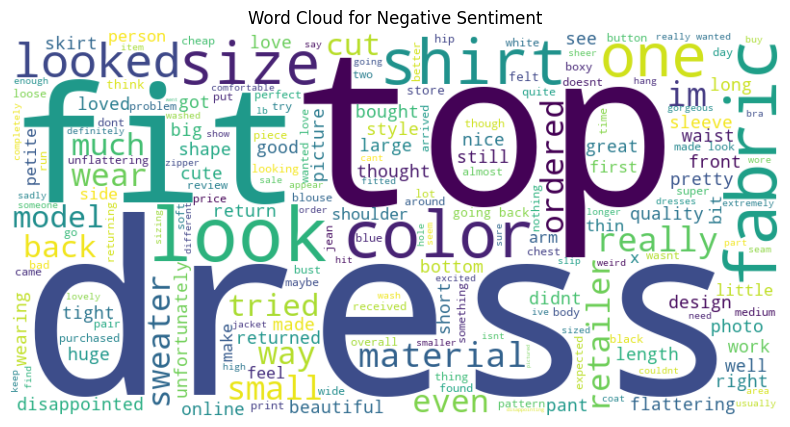

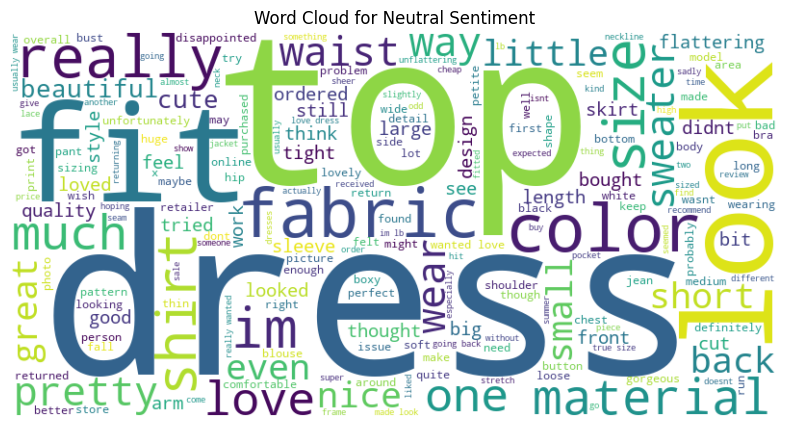

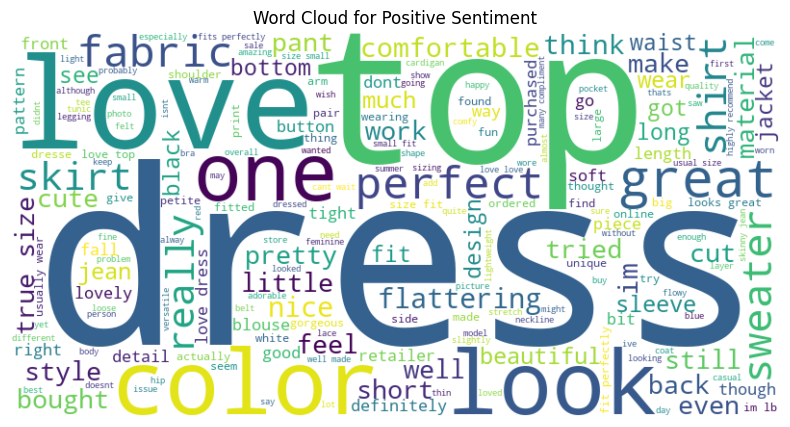

In [16]:
# Create word clouds for each sentiment label
sentiments = ['negative', 'neutral', 'positive']

for sentiment in sentiments:
    # Filter texts by sentiment
    texts = df[df['Sentiment'] == sentiment]['Review Text'].tolist()
    text = ' '.join(texts)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

# UPSAMPLING: Dangerous, lets start with just 10% of the data

# Take 10% of the data


In [26]:
df = df.sample(frac=.1, random_state=42).reset_index(drop=True)

In [32]:
TRAIN_TEST_SPLIT = 0.2
SAMPLE_SIZE = int(df.groupby('Sentiment').size().min() * (1 - TRAIN_TEST_SPLIT))
SAMPLE_SIZE

167

In [34]:
# Define the resampling techniques
# Define the resampling techniques
# over_sampling_strategy = {2: 17435, 1: 17435, 0: 17435}
# under_sampling_strategy = {2: 17435, 1: 17435, 0: 17435}

over_sampling_strategy = {0: SAMPLE_SIZE, 1: SAMPLE_SIZE, 2: SAMPLE_SIZE}
under_sampling_strategy = {0: SAMPLE_SIZE, 1: SAMPLE_SIZE, 2: SAMPLE_SIZE}

# cur
over_sampler = SMOTE(sampling_strategy=over_sampling_strategy)
under_sampler = RandomUnderSampler(sampling_strategy=under_sampling_strategy)

SMOTE(sampling_strategy={0: 167, 1: 167, 2: 167})

In [39]:
# Define the pipeline for TF-IDF transformation
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert text data to TF-IDF features
])

# Apply TF-IDF transformation
X_tfidf = tfidf_pipeline.fit_transform(X_text)

# Define the pipeline for resampling
resampling_pipeline = Pipeline([
    # ('o', over_sampler),  # Oversample minority classes
    ('u', under_sampler)  # Undersample majority classes
])

In [40]:
# Apply resampling
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_tfidf, y)

In [41]:
# Print the output of each step in the pipeline
print("Output after TF-IDF transformation:")
print(X_resampled)

Output after TF-IDF transformation:
  (0, 4944)	0.3074004963136202
  (0, 11909)	0.2983202990651509
  (0, 12795)	0.26367615069980904
  (0, 2702)	0.3454195746893275
  (0, 14486)	0.22426336833783636
  (0, 4314)	0.27505306785329364
  (0, 368)	0.1839296047953324
  (0, 10440)	0.19457782078234875
  (0, 13059)	0.14586809843353252
  (0, 9360)	0.2598612565837993
  (0, 1472)	0.3624496202554467
  (0, 940)	0.1244714508364423
  (0, 8434)	0.1278693665212214
  (0, 5071)	0.3264235717182106
  (0, 13456)	0.15275829305282493
  (0, 8229)	0.09555835368265257
  (0, 5852)	0.15817340814730543
  (0, 5519)	0.11821494555600218
  (1, 13071)	0.325173093842142
  (1, 4996)	0.4106483934161795
  (1, 5364)	0.31968166031843
  (1, 126)	0.315058940504242
  (1, 4839)	0.3323267827887519
  (1, 3786)	0.27176158471499573
  (1, 7072)	0.17529556889523595
  :	:
  (500, 8233)	0.15796104823539422
  (500, 5184)	0.18214050352225217
  (500, 11585)	0.14555521174775007
  (500, 10991)	0.1554192479565294
  (500, 1280)	0.13126554360973264
 

In [42]:
# Check the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution after resampling: Counter({0: 167, 1: 167, 2: 167})


In [43]:
# Convert X_resampled and y_resampled to DataFrame
balanced_df = pd.DataFrame({'Review Text': X_resampled, 'Sentiment': y_resampled})

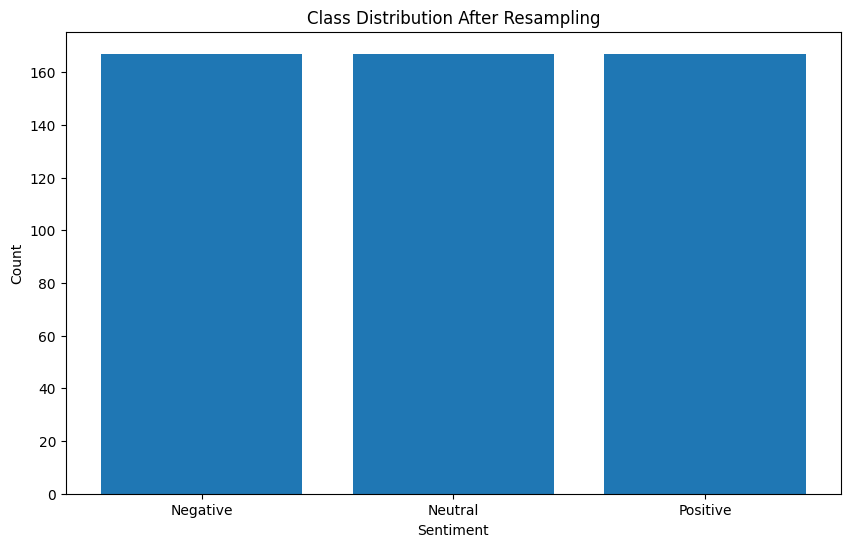

,Review Text,Sentiment
0,"(0, 4944)\t0.3074004963136202\n (0, 11909)\...",0
1,"(0, 13071)\t0.325173093842142\n (0, 4996)\t...",0
2,"(0, 2259)\t0.24315565086719335\n (0, 14981)...",0
3,"(0, 16768)\t0.23197404423124193\n (0, 795)\...",0
4,"(0, 16022)\t0.3376904872958922\n (0, 9758)\...",0
...,...,...
496,"(0, 14421)\t0.5642316078075884\n (0, 2282)\...",2
497,"(0, 6723)\t0.40188039661048014\n (0, 183)\t...",2
498,"(0, 15286)\t0.2535140024055608\n (0, 10358)...",2
499,"(0, 2481)\t0.4218398603597754\n (0, 12442)\...",2


In [45]:
# Visualize the class distribution after resampling
plt.figure(figsize=(10, 6))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
plt.title('Class Distribution After Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.show()

# Save the balanced dataset as df
# balanced_df.to_csv(/.kaggle/working/womenclothing/balanced_dataset.csv', index=False)
balanced_df

In [46]:
from scipy.sparse import csr_matrix

In [47]:
# Get the trained TfidfVectorizer from your TF-IDF pipeline
tfidf_vectorizer = tfidf_pipeline.named_steps['tfidf']

# Convert the TF-IDF transformed data back to the original text format
X_text_original = tfidf_vectorizer.inverse_transform(X_resampled)

# Create a new DataFrame with the original text format
df_original = pd.DataFrame({'Review Text': [' '.join(row) for row in X_text_original], 'Sentiment': y_resampled})

In [48]:
df_original

,Review Text,Sentiment
0,excess relatively sending clown suit drapey al...,0
1,shorter expecting fine actually especially def...,0
2,cashier tented laughing bizarre designer def r...,0
3,whitish astronomical missed mark background je...,0
4,unless normally normal sizes two order buy don...,0
...,...,...
496,subdued catalog shown however adorable receive...,2
497,highwaisted adore stretch skinny boots dont cu...,2
498,tietop palazzo surprising legged moveable awes...,2
499,childish sad drop beautiful looked short felt ...,2


In [51]:
from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
from transformers import BertForSequenceClassification, BertTokenizer
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from transformers import BertModel

In [52]:
# Tokenize the "Review Text" column
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_inputs = tokenizer(df_original['Review Text'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
input_ids = tokenized_inputs.input_ids
attention_masks = tokenized_inputs.attention_mask
y = df_original['Sentiment']

In [53]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(input_ids, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [54]:
# Define the number of splits for KFold
num_splits = 10
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

In [55]:
# Define lists to store metrics for each fold
train_losses_per_fold = []
valid_losses_per_fold = []
accuracies_per_fold = []

# Bert Model

In [56]:
# Define the model with activation function and regularization
class BertWithActivationAndRegularization(nn.Module):
    def __init__(self, pretrained_model_name, num_labels, dropout_prob=0.5, weight_decay=0.01):
        super(BertWithActivationAndRegularization, self).__init__()
        self.bert = BertModel.from_pretrained(pretrained_model_name)
        self.dropout = nn.Dropout(dropout_prob)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
        self.activation = nn.GELU()
        self.weight_decay = weight_decay
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        logits = self.activation(logits)  # Applying GELU activation function
        return logits

In [57]:
# Loop over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}/{num_splits}")
    # Split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  # Updated this line

Fold 1/10
Fold 2/10
Fold 3/10
Fold 4/10
Fold 5/10
Fold 6/10
Fold 7/10
Fold 8/10
Fold 9/10
Fold 10/10


In [58]:
batch_size = 16

In [66]:
# Create PyTorch datasets and data loaders for this fold
try:
    train_dataset = TensorDataset(X_train_fold.cuda(), attention_masks[train_index].cuda(), torch.tensor(y_train_fold.values).cuda())
    val_dataset = TensorDataset(X_val_fold.cuda(), attention_masks[val_index].cuda(), torch.tensor(y_val_fold.values).cuda())
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
except Exception:
    train_dataset = TensorDataset(X_train_fold, attention_masks[train_index], torch.tensor(y_train_fold.values))
    val_dataset = TensorDataset(X_val_fold, attention_masks[val_index], torch.tensor(y_val_fold.values))
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

In [67]:
# Specify the pretrained BERT model name
model_name = 'bert-base-uncased'

# Create an instance of the model
model = BertWithActivationAndRegularization(pretrained_model_name='bert-base-uncased', num_labels=3)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertWithActivationAndRegularization(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), 

In [68]:
import torch.optim as optim

# Define the optimizer and criterion
learning_rate = 2e-06
weight_decay = 0.0001  
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

In [69]:
# Lists to store losses for this fold
train_losses_fold = []
valid_losses_fold = []
accuracies_fold = []

In [70]:
# Training loop
epochs = 6
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_train_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loss.backward()
        optimizer.step()

    average_train_loss = total_train_loss / len(train_dataloader)
    train_losses_fold.append(average_train_loss)

    # Validation loop
    model.eval()
    total_valid_loss = 0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs
            loss = criterion(logits, labels)
            total_valid_loss += loss.item()
            
            _, predicted = torch.max(logits, 1)
            correct_valid += (predicted == labels).sum().item() 
            total_valid += labels.size(0)

    average_valid_loss = total_valid_loss / len(val_dataloader)
    valid_losses_fold.append(average_valid_loss)

    # Calculate accuracy for this fold
    accuracy_train = correct_train / total_train
    accuracy_valid = correct_valid / total_valid
    accuracies_fold.append((accuracy_train, accuracy_valid))

    print(f'Epoch {epoch+1}/{epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_valid_loss:.4f} - Training Accuracy: {accuracy_train:.4f} - Validation Accuracy: {accuracy_valid:.4f}')

# Save metrics for this fold
train_losses_per_fold.append(train_losses_fold)
valid_losses_per_fold.append(valid_losses_fold)
accuracies_per_fold.append(accuracies_fold)

Epoch 1/6 - Training Loss: 1.1219 - Validation Loss: 1.1120 - Training Accuracy: 0.2984 - Validation Accuracy: 0.2857
Epoch 2/6 - Training Loss: 1.1134 - Validation Loss: 1.1377 - Training Accuracy: 0.3079 - Validation Accuracy: 0.2000
Epoch 3/6 - Training Loss: 1.0774 - Validation Loss: 1.1369 - Training Accuracy: 0.4095 - Validation Accuracy: 0.2286
Epoch 4/6 - Training Loss: 1.0985 - Validation Loss: 1.1628 - Training Accuracy: 0.3556 - Validation Accuracy: 0.2000
Epoch 5/6 - Training Loss: 1.0849 - Validation Loss: 1.1446 - Training Accuracy: 0.3683 - Validation Accuracy: 0.2286
Epoch 6/6 - Training Loss: 1.0801 - Validation Loss: 1.1631 - Training Accuracy: 0.4159 - Validation Accuracy: 0.2000


In [71]:
 # Debugging print statements to check the lengths
print("Length of train_losses_fold:", len(train_losses_fold))
print("Length of valid_losses_fold:", len(valid_losses_fold)) 

Length of train_losses_fold: 6
Length of valid_losses_fold: 6


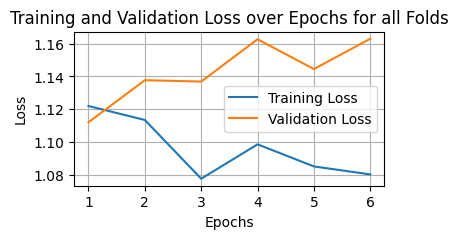

In [72]:
# Plotting training and validation losses for all folds
num_epochs = len(train_losses_fold)
plt.figure(figsize=(4, 2))
plt.plot(range(1, num_epochs + 1), train_losses_fold, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses_fold, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for all Folds')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
from transformers import BertModel

# Instantiate the model architecture
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name)

# Save the model's state dictionary
model.save_pretrained("./kaggle/working/logs/")

In [76]:
# Load the saved model from the specified path
model = BertModel.from_pretrained("/.kaggle/working/logs/")

OSError: Incorrect path_or_model_id: '/.kaggle/working/logs/'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

# RoBERTa model

In [ ]:
X_text = df['Review Text']  # Text data```
y = df['Sentiment']  # Target variable

In [ ]:
# Convert sentiment labels to 2, 1, 0
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
y = y.map(label_mapping)

In [ ]:
# Define the resampling techniques
over_sampling_strategy = {2: 17435, 1: 2823, 0: 2370}
under_sampling_strategy = {2: 2370, 1: 2370, 0: 2370}
over_sampler = SMOTE(sampling_strategy=over_sampling_strategy)
under_sampler = RandomUnderSampler(sampling_strategy=under_sampling_strategy)

In [ ]:
# Apply resampling
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_tfidf, y)

In [ ]:
# Print the output of each step in the pipeline
print("Output after TF-IDF transformation:")
print(X_resampled)

Output after TF-IDF transformation:
  (0, 7413)	0.27413234528199404
  (0, 5246)	0.26337631489465496
  (0, 9715)	0.24498875949737942
  (0, 12108)	0.1650805839408661
  (0, 17170)	0.1989738958541982
  (0, 816)	0.2173614512514737
  (0, 9707)	0.17594555754081112
  (0, 5280)	0.19213429935393866
  (0, 2045)	0.15551034358365767
  (0, 12375)	0.16831403253087468
  (0, 10674)	0.14285344927806784
  (0, 12258)	0.14042791603716154
  (0, 5623)	0.1813782689665996
  (0, 12479)	0.12363249649447347
  (0, 14205)	0.11679911619459052
  (0, 12313)	0.14884356616357675
  (0, 1260)	0.1766087829598841
  (0, 16305)	0.11296778335732773
  (0, 9433)	0.14594270197920514
  (0, 578)	0.1337802232473899
  (0, 13757)	0.09570128075546036
  (0, 15428)	0.2799013921425203
  (0, 12097)	0.10021536971115012
  (0, 5742)	0.13228622847772378
  (0, 9695)	0.20679299519335875
  :	:
  (52304, 11681)	0.2916274829202017
  (52304, 893)	0.19517903315068058
  (52304, 700)	0.15324412999992323
  (52304, 14837)	0.19249503973690546
  (52304, 12

In [ ]:
# Check the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution after resampling: Counter({0: 17435, 1: 17435, 2: 17435})


In [ ]:
# Convert X_resampled and y_resampled to DataFrame
balanced_df = pd.DataFrame({'Review Text': X_resampled, 'Sentiment': y_resampled})

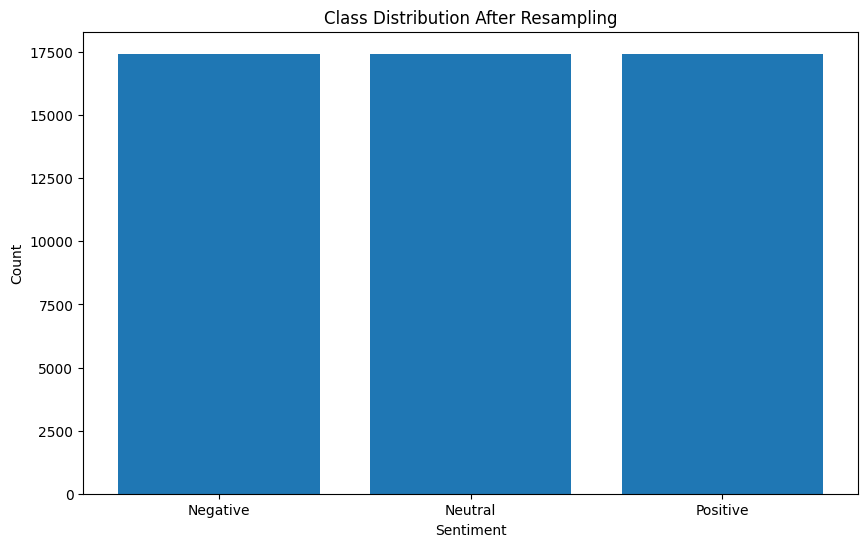

,Review Text,Sentiment
0,"(0, 7413)\t0.27413234528199404\n (0, 5246)\...",0
1,"(0, 8967)\t0.0695619682073513\n (0, 2934)\t...",0
2,"(0, 1787)\t0.005094104232613873\n (0, 14288...",0
3,"(0, 17339)\t0.18043138324085845\n (0, 17884...",0
4,"(0, 12344)\t0.04599285146981243\n (0, 17032...",0
...,...,...
52300,"(0, 12202)\t0.41522885677369914\n (0, 4142)...",2
52301,"(0, 11663)\t0.25362059115430546\n (0, 240)\...",2
52302,"(0, 13401)\t0.2845366674198441\n (0, 8606)\...",2
52303,"(0, 4894)\t0.22968491883208933\n (0, 9691)\...",2


In [ ]:
# Visualize the class distribution after resampling
plt.figure(figsize=(10, 6))
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
plt.title('Class Distribution After Resampling')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.show()

# Save the balanced dataset as df
balanced_df.to_csv('balanced_dataset.csv', index=False)
balanced_df

In [ ]:
from scipy.sparse import csr_matrix

In [77]:
# Get the trained TfidfVectorizer from your TF-IDF pipeline
tfidf_vectorizer = tfidf_pipeline.named_steps['tfidf']

# Convert the TF-IDF transformed data back to the original text format
X_text_original = tfidf_vectorizer.inverse_transform(X_resampled)

# Create a new DataFrame with the original text format
df_original = pd.DataFrame({'Review Text': [' '.join(row) for row in X_text_original], 'Sentiment': y_resampled})

In [78]:
df_original

,Review Text,Sentiment
0,excess relatively sending clown suit drapey al...,0
1,shorter expecting fine actually especially def...,0
2,cashier tented laughing bizarre designer def r...,0
3,whitish astronomical missed mark background je...,0
4,unless normally normal sizes two order buy don...,0
...,...,...
496,subdued catalog shown however adorable receive...,2
497,highwaisted adore stretch skinny boots dont cu...,2
498,tietop palazzo surprising legged moveable awes...,2
499,childish sad drop beautiful looked short felt ...,2


In [79]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split, KFold
import torch.optim as optim
from transformers import RobertaModel

In [80]:
# Tokenize the "Review Text" column
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenized_inputs = tokenizer(df_original['Review Text'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)
input_ids = tokenized_inputs.input_ids
attention_masks = tokenized_inputs.attention_mask
y = df_original['Sentiment']

In [81]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(input_ids, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [82]:
# Define the number of splits for KFold
num_splits = 10
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

In [83]:
# Define lists to store metrics for each fold
train_losses_per_fold = []
valid_losses_per_fold = []
accuracies_per_fold = []

In [84]:
# Define the model with activation function and regularization
class RobertaWithActivationAndRegularization(nn.Module):
    def __init__(self, pretrained_model_name, num_labels, dropout_prob=0.5, weight_decay=0.01):
        super(RobertaWithActivationAndRegularization, self).__init__()
        self.roberta = RobertaModel.from_pretrained(pretrained_model_name)
        self.dropout = nn.Dropout(dropout_prob)
        self.classifier = nn.Linear(self.roberta.config.hidden_size, num_labels)
        self.activation = nn.GELU()
        self.weight_decay = weight_decay
        
    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        logits = self.activation(logits)  # Applying GELU activation function
        return logits

In [85]:
# Loop over each fold
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold+1}/{num_splits}")
    # Split the data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]  # Updated this line

Fold 1/10
Fold 2/10
Fold 3/10
Fold 4/10
Fold 5/10
Fold 6/10
Fold 7/10
Fold 8/10
Fold 9/10
Fold 10/10


In [86]:
batch_size = 16

In [87]:
# Create PyTorch datasets and data loaders for this fold
train_dataset = TensorDataset(X_train_fold.cuda(), attention_masks[train_index].cuda(), torch.tensor(y_train_fold.values).cuda())
val_dataset = TensorDataset(X_val_fold.cuda(), attention_masks[val_index].cuda(), torch.tensor(y_val_fold.values).cuda())
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

AssertionError: Torch not compiled with CUDA enabled

In [88]:
# Specify the pretrained BERT model name
model_name = 'roberta-base'

# Create an instance of the model
model = RobertaWithActivationAndRegularization(pretrained_model_name='roberta-base', num_labels=3)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaWithActivationAndRegularization(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
       

In [89]:
import torch.optim as optim

# Define the optimizer and criterion
learning_rate = 2e-06
weight_decay = 0.0001  
optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

In [90]:
# Lists to store losses for this fold
train_losses_fold = []
valid_losses_fold = []
accuracies_fold = []

In [91]:
# Training loop
epochs = 6
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs
        loss = criterion(logits, labels)
        total_train_loss += loss.item()

        _, predicted = torch.max(logits, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

        loss.backward()
        optimizer.step()

    average_train_loss = total_train_loss / len(train_dataloader)
    train_losses_fold.append(average_train_loss)

    # Validation loop
    model.eval()
    total_valid_loss = 0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs
            loss = criterion(logits, labels)
            total_valid_loss += loss.item()
            
            _, predicted = torch.max(logits, 1)
            correct_valid += (predicted == labels).sum().item() 
            total_valid += labels.size(0)

    average_valid_loss = total_valid_loss / len(val_dataloader)
    valid_losses_fold.append(average_valid_loss)

    # Calculate accuracy for this fold
    accuracy_train = correct_train / total_train
    accuracy_valid = correct_valid / total_valid
    accuracies_fold.append((accuracy_train, accuracy_valid))

    print(f'Epoch {epoch+1}/{epochs} - Training Loss: {average_train_loss:.4f} - Validation Loss: {average_valid_loss:.4f} - Training Accuracy: {accuracy_train:.4f} - Validation Accuracy: {accuracy_valid:.4f}')

# Save metrics for this fold
train_losses_per_fold.append(train_losses_fold)
valid_losses_per_fold.append(valid_losses_fold)
accuracies_per_fold.append(accuracies_fold)

Epoch 1/6 - Training Loss: 1.1047 - Validation Loss: 1.0823 - Training Accuracy: 0.3175 - Validation Accuracy: 0.3714
Epoch 2/6 - Training Loss: 1.1029 - Validation Loss: 1.0832 - Training Accuracy: 0.3206 - Validation Accuracy: 0.3714
Epoch 3/6 - Training Loss: 1.0992 - Validation Loss: 1.0861 - Training Accuracy: 0.3270 - Validation Accuracy: 0.3714
Epoch 4/6 - Training Loss: 1.1025 - Validation Loss: 1.0888 - Training Accuracy: 0.3556 - Validation Accuracy: 0.3714
Epoch 5/6 - Training Loss: 1.0990 - Validation Loss: 1.0910 - Training Accuracy: 0.3397 - Validation Accuracy: 0.3714
Epoch 6/6 - Training Loss: 1.0960 - Validation Loss: 1.0910 - Training Accuracy: 0.3333 - Validation Accuracy: 0.3714


In [92]:
 # Debugging print statements to check the lengths
print("Length of train_losses_fold:", len(train_losses_fold))
print("Length of valid_losses_fold:", len(valid_losses_fold)) 

Length of train_losses_fold: 6
Length of valid_losses_fold: 6


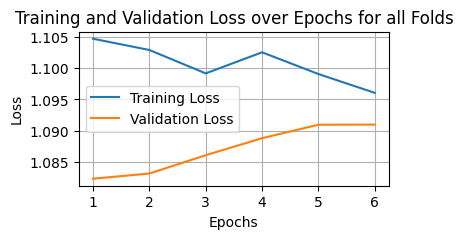

In [93]:
# Plotting training and validation losses for all folds
num_epochs = len(train_losses_fold)
plt.figure(figsize=(4, 2))
plt.plot(range(1, num_epochs + 1), train_losses_fold, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses_fold, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for all Folds')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
from transformers import RobertaModel

model = RobertaModel.from_pretrained(model_name)

# Save the model's state dictionary
model.save_pretrained("./kaggle/working/logs/")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [97]:
# Load the saved model from the specified path
model = RobertaModel.from_pretrained("./kaggle/working/logs/")

# Ensemble model